In [ ]:
import numpy as np
import random
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.linalg as sclinalg

In [ ]:
#задаем размерности исходных пространств
N_a=2
N_b=3

In [ ]:
#задаем вектора в пространствах А и В
V_a=np.matrix(np.random.randn(N_a)).T
V_b=np.matrix(np.random.randn(N_b)).T
V_a

matrix([[-0.96280308],
        [-0.08065543]])

In [ ]:
ak = lambda t: np.sin(t)
bk = lambda t: np.cos(t)
ck = lambda t: np.sin(t)
dk = lambda t: np.cos(t)
ek = lambda t: np.sin(t)
fk = lambda t: np.cos(t)

F = lambda t: np.matrix([[0, 0, 0, 0, 0, ck(t)],
                         [0, 0, 0, ak(t), 0, 0],
                         [0, 0, 0, 0, bk(t), 0],
                         [0, fk(t), 0, 0, 0, 0],
                         [0, 0, ek(t), 0, 0, 0],
                         [dk(t), 0, 0, 0, 0, 0]])

In [ ]:
#матрица с постоянными коэффициентами
# F = lambda t: np.matrix([[0, 0, 0, 0, 0, 1],
#                          [0, 0, 0, 1, 0, 0],
#                          [0, 0, 0, 0, 1, 0],
#                          [0, 1, 0, 0, 0, 0],
#                          [0, 0, 1, 0, 0, 0],
#                          [1, 0, 0, 0, 0, 0]])

В предположении, что собственные числа матрицы F меняются не столь сильно за промежуток времени $\tau$, будем считать, что
$$T\exp \left(\int_t^{T+\tau} F(t) dt \right) \approx \exp
\left(F \left(T+\frac{\tau}{2} \right) \cdot \tau \right)$$


In [ ]:
def u(F, tau, t_i):
  return sclinalg.expm(F(t_i-tau/2)*tau)

In [ ]:
N = 5000
t = np.linspace(0, 15, N+1)
tau = t[1]-t[0]

In [ ]:
# #Находим вектор в простанстве С
# V_c=np.tensordot(V_a,V_b,axes=0).flatten()
# V_c

In [ ]:
f = [np.matrix(np.zeros((6,1))) for i in range(N+1)]
#Находим начальное состояние системы в пространстве C
f[0] = np.matrix([[V_a[0, 0]*V_b[0, 0]],
                  [V_a[0, 0]*V_b[1, 0]],
                  [V_a[0, 0]*V_b[2, 0]],
                  [V_a[1, 0]*V_b[0, 0]],
                  [V_a[1, 0]*V_b[1, 0]],
                  [V_a[1, 0]*V_b[2, 0]]])
f[0]

matrix([[ 0.75048042],
        [-1.26459713],
        [ 0.66006273],
        [ 0.06286885],
        [-0.10593716],
        [ 0.05529442]])

In [ ]:
#Вычисляем состояние системы в каждый момент времени
for i in range(1, N+1):
  f[i] = u(F, tau, t[i])@f[i-1]

In [ ]:

def evq_metr(x):
  a=np.array([x[0],x[1]])
  b=np.array([x[2],x[3],x[4]])
  c=np.tensordot(a,b,axes=0).flatten()
  c=np.matrix(c)
  c=c.T
  evq=0
  for i in range(len(c)):
    evq=evq+float(fc[i]-c[i])**2
  return evq

In [ ]:
finall_arr=[]
for i in range(N+1):
  fc=f[i]
  res = minimize(evq_metr, x0=[1, 0, 0, 2, 0])
  finall_arr.append(res.fun)

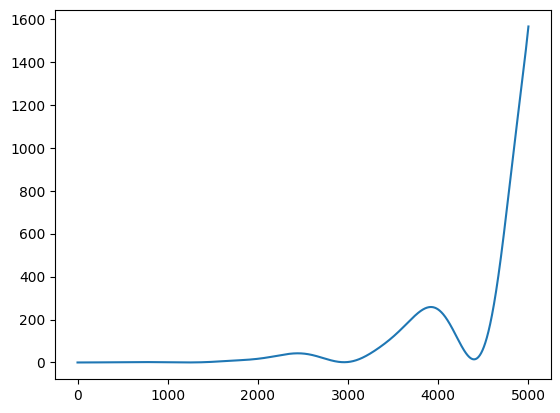

In [ ]:
#строим зависимость критерия перепутанности от времени
plt.plot(finall_arr)
plt.show()

0.563220861645021
10.657594414631447
0.43568280392505887
0.00395249170835213
0.011222680985098146
0.003057473164178958
